In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import scipy.stats


In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,5

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#### Задание

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

2. Проведите первичный анализ.

    a) Проверьте данные на пропуски. Удалите в случае обнаружения. *Предложите альтернативный способ работы с пропусками
    
    b) Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)
    
    c) Преобразуйте категориальные признаки.
    
3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

4. Обучите модели логистической регрессии и опорных векторов на обучающем множестве. 

5. Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей. Для этого используйте встроенную функцию score.

6. Сформулируйте выводы по проделанной работе. 

    a) Кратко опишите какие преобразования были сделаны с данными.
    
    b) Сравните точность двух моделей.
    
    c)Напишите свое мнение, в полной ли мере модели справились с поставленной задачей. *Что по вашему мнению нужно сделать, чтобы улучшить результат ?


In [37]:
data = pd.read_csv('https://datahub.io/machine-learning/adult/r/adult.csv', delimiter = ',')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


In [18]:
# data.dropna().info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capitalgain     48842 non-null  int64 
 11  capitalloss     48842 non-null  int64 
 12  hoursperweek    48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Что имеем?

Имеем некоторое количество пропусков в разных колонках, которые надо убрать. По идее, если сильно заморачиваться, то можно поработать с различными вариантами заполнения данных путем нахождения аналогов и закономерностей (развлекался так с датасетом про колики у лошадей на курсе по python для DS, в результате выкинул всего 4 строки, а все остальное было заполнено), но в данном случае просто удалим строки с дубликатами и пропусками.

In [38]:
data = data.drop_duplicates().dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45059 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45059 non-null  int64 
 1   workclass       45059 non-null  object
 2   fnlwgt          45059 non-null  int64 
 3   education       45059 non-null  object
 4   education-num   45059 non-null  int64 
 5   marital-status  45059 non-null  object
 6   occupation      45059 non-null  object
 7   relationship    45059 non-null  object
 8   race            45059 non-null  object
 9   sex             45059 non-null  object
 10  capitalgain     45059 non-null  int64 
 11  capitalloss     45059 non-null  int64 
 12  hoursperweek    45059 non-null  int64 
 13  native-country  45059 non-null  object
 14  class           45059 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


## EDA

Посмотрим, как отдельные самые логичные по взаимосвязям колонки коррелируют с нашей целевой колонкой **class**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


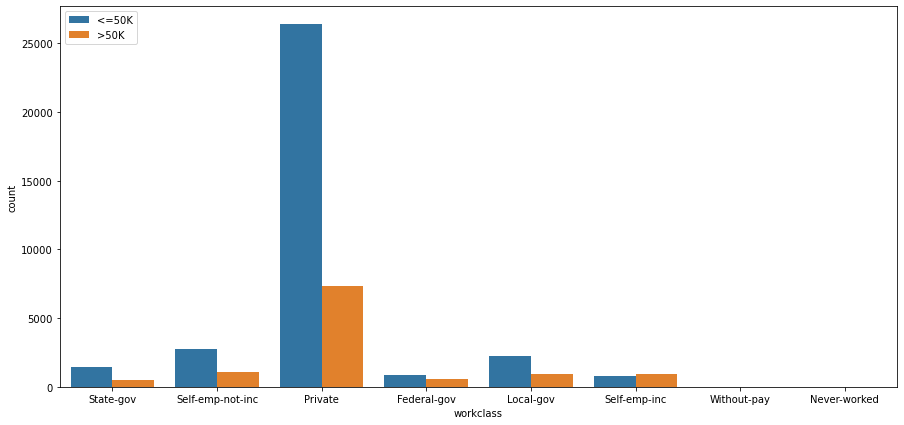

In [138]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data.workclass,hue=data['class'])
plt.legend(['<=50K', '>50K'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


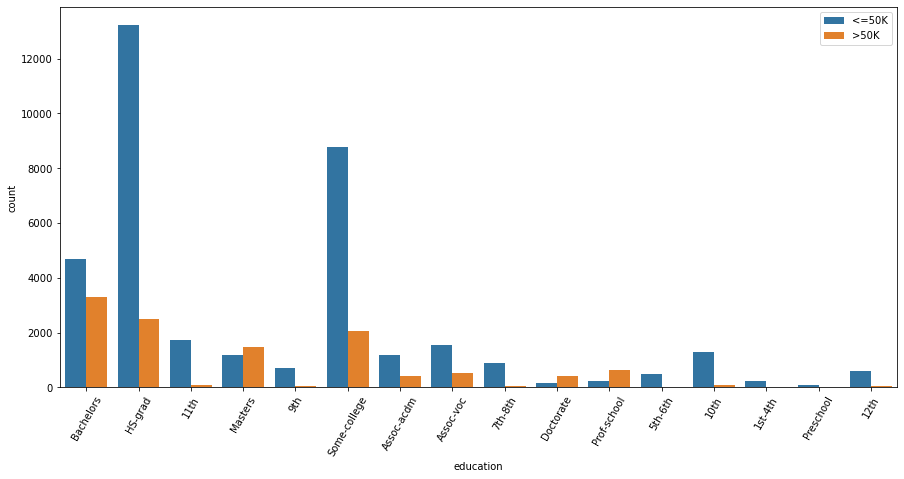

In [140]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data.education,hue=data['class'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.legend(['<=50K', '>50K'])

Честно? Вообще никаких прямых связей, как по мне. Более того, даже рассовые сравнения тоже не дают какую-то четкую корреляцию.

Займемся чем-то более продуктивным.
На текущий момент вполне понятно, что отдельные колонки имеют плохо выраженную корреляцию с целевой, поэтому будем использовать набор колонок для обучения модели. Но поскольку подавляющее большинство колонко у нас содержит текстовые определения (категории), то для начала необходимо преобразовать DF во что-то более обучаемое.

Для таких колонок как sex иб собстсвенноб сдаыы (целевая колонка, будущий Y), нам достаточно применить Label Encoding, поскольку там всего две категории, а вот для 'race', 'education', 'marital-status', 'occupation', 'hoursperweek', 'native-country' мы применим one hot encoding

In [39]:
# data['income'] = le.transform(data['income']['gender'])
data[['sex', 'class']] = data[['sex', 'class']].apply(le.fit_transform)

In [40]:
data = pd.get_dummies(data, columns=['race', 'education', 'marital-status', 'occupation', 'hoursperweek', 'native-country'])

Выделим отдельно X и Y.
В X снесем все лишние колонки, которые нам не потребуются

In [41]:
X = data.drop(['workclass', 'fnlwgt', 'education-num', 'relationship', 'capitalgain', 'capitalloss', 'age'], axis=1)

In [42]:
Y = pd.Series(data['class'])
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int32

In [46]:
X.head()

,sex,class,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,education_10th,education_11th,education_12th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Начнем натягивать ~~кота на глобус~~ модель на дата фрейм:

In [68]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=13)

In [65]:
a_model = LogisticRegression()
a_model.fit(X_train, y_train)
predictions = a_model.predict(X_test)

In [66]:
a_model.score(X_train, y_train) 

1.0

Ну как-то очень круто получилось. Есть подозрение, что модель переобучилась. Проверим на тесте:

In [67]:
a_model.score(X_test, y_test) 

1.0

Аналогично. Ну, ок... Самое интересное, что даже если сделаю разделение 60/40, все равно результат обучения будет 100%б что очень сильно смущает.

попробуем **SVM**:

In [69]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler


In [70]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto')) 
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [71]:
clf.score(X_test, y_test) 

0.9950066577896138

Обучение и тестирование работают медленнее, чем логистическая регрессия, а результат несколько хуже, хотя и реалистичнее.

Вывод.

Если честно, я уже как-то раньше разбирал данный датасет и тогда у меня степень качества не превышала 78%ю Сейчас то ли я что-то не так сделал, то ли наоборот слишком хорошо подобрал и подготовил данные, но качество вызывающе высокое. И это очень смущает.